# Chapter 1 - Data Exploration & Data Visualisation

This chapter is the first step in understanding the Car Sales Industry within Maryland. The components of the database schema are going to explored. Understanding how these values have changed over time will lay a good foundation for the seasonality exploration that will take place in chapter 2. This chapter is focused on visualisation which focuses on identifying overall trends and gaining an understanding of any underlying patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#Load in the datasets that have been joined in SQL so that all variables have been included
#This file is found in R_files in chapter 1 yearly cars sold as cars_sold_economic_socioeconomic_data.csv
monthly_data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/R_files/chapter 1 yearly cars sold/monthly_car_sales_all_data.csv')
#This is going to set the index to month so that you can sense of the data easier
monthly_data.set_index(monthly_data['month'],inplace=True)
#The column month remains in the dataframe so it needs to be deleted
monthly_data.drop(columns='month',inplace=True)
#The month also needs to viewed as datetime so that it can graphed as a time series
monthly_data.index = pd.to_datetime(monthly_data.index)
monthly_data

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,5.0,5.5,2.6
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,5.0,5.2,2.6
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,5.0,5.1,2.4
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,4.9,4.9,2.5
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,4.9,4.7,2.5
...,...,...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,2.0,1.7,4.8
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,1.8,1.7,4.7
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,1.7,1.8,4.3


The data that has been loaded in is the monthly car sales data that combines economic, socioeconomic data and yearly car sales data into one large table. Using Pandas you are able to select certain columns to graph. As this section is going to use a lot of scatter plots / line graphs, multiple functions need to be created to reduce the repeated code when graphing data. You can view the functions below.

In [3]:
#Create a function called 'scatterplot' which can be done for simple Time Series Graphs with a line connecting each point
def scatterplot(xdata,ydata,title,xlabel,ylabel,marker='o'):
    plt.figure(figsize = (12,8))
    plt.scatter(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [4]:
#Create a function called 'time_series_line' which can be done for simple Time Series Graphs with a line connecting each point
def line_time_series(xdata,ydata,title,xlabel,ylabel,marker='o'):
    plt.figure(figsize = (12,8))
    ydata.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


## Monthly Cars Sold in Maryland Analysis

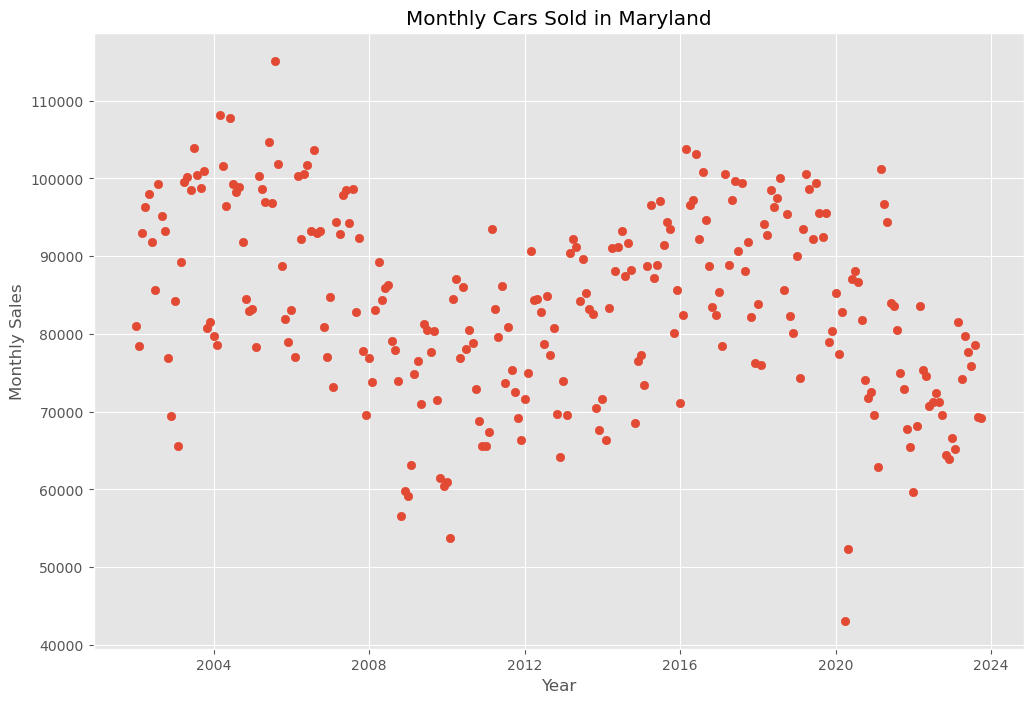

In [5]:
#Create a plot of monthly sales in Maryland
scatterplot(monthly_data.index,monthly_data['total_cars_sold'], 'Monthly Cars Sold in Maryland', 'Year','Monthly Sales')

### Review of Monthly Cars Sold in Maryland from 2002-2023
The time series represents the combination of Used Cars Sold and New Cars Sold as a singular variable, Cars Sold. This creates a graph that encapsulates the number of cars sold in each month from 2002-2023. There is a clear decline in the average number of cars sold as well as some periods of major fluctuations. There is a steady decline in number of cars sold from 2002-2023 with the major fluctuation periods being observed around 2008 and 2020.

Cars Sold seem to max out during 2003-2005 and steadily decrease to low around 2008-2009 likely due to the Global Financial Crises (2007-2008).

There is a recovery in years following, yet there is another drop in sales following 2020 which is likely due to Covid-19 (2020-2023).

#### Introduction to Economic Events

The analysis of car sales trends in Maryland from 2002 to 2023 reveals significant fluctuations, some of which coincide with major economic events. Two notable events are the Global Financial Crisis of 2007-2009 and the COVID-19 pandemic of 2020-2023. 

##### Global Financial Crisis (2007-2009)

The Global Financial Crisis, triggered by the collapse of the housing market in the United States, had widespread repercussions across the global economy. The crisis led to a sharp decline in consumer confidence, tightening credit markets, and a severe economic downturn in many countries. This downturn likely contributed to the drop in car sales observed in Maryland during the years surrounding the crisis (2007-2009).

##### COVID-19 Pandemic (2020-2023)

The COVID-19 pandemic, which originated in late 2019 and spread globally in 2020, resulted in unprecedented disruptions to economic activity, travel restrictions, and lockdown measures to contain the spread of the virus. These measures had significant impacts on consumer behavior, business operations, and supply chains, leading to a contraction in economic activity and a downturn in various sectors, including the automotive industry. The observed drop in car sales in Maryland following 2020 is likely attributable, at least in part, to the economic effects of the pandemic.


### How Global Financial Events impacted Numbers of Cars Sold

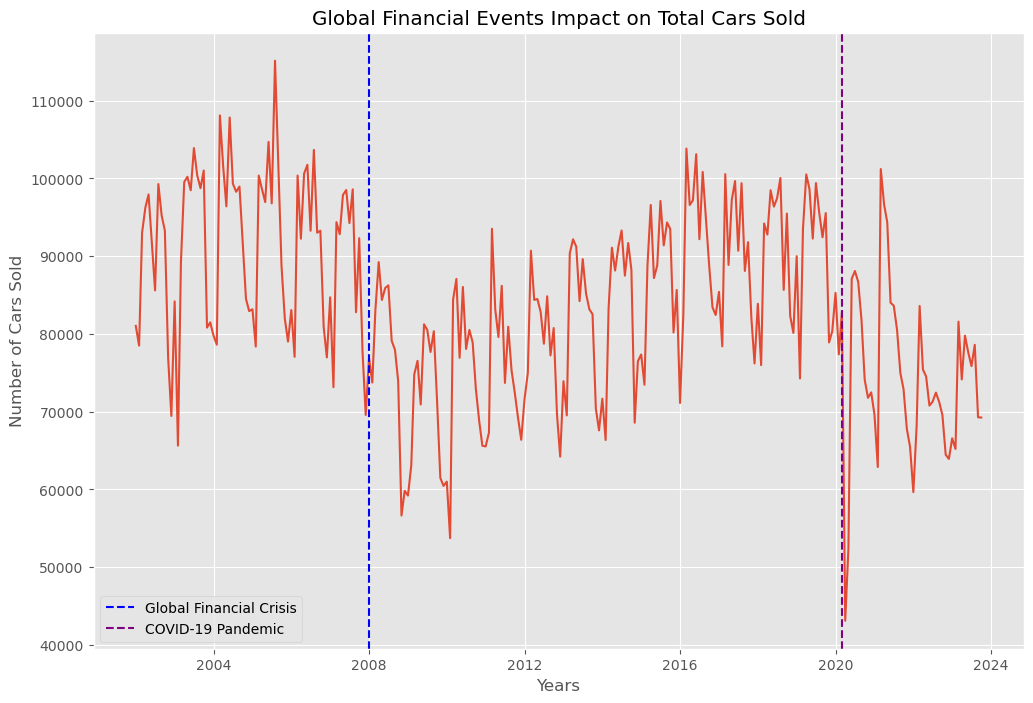

In [6]:
from datetime import datetime
import matplotlib.pyplot as plt

plt.plot(monthly_data.index, monthly_data['total_cars_sold'])
plt.title('Global Financial Events Impact on Total Cars Sold')
plt.xlabel('Years')
plt.ylabel('Number of Cars Sold')

# Convert the date string to datetime object for Global Financial Crisis (GFC)
gfc_date = datetime.strptime('2008-01-01', '%Y-%m-%d')
# Add vertical line for GFC
plt.axvline(x=gfc_date, color='b', linestyle='--', label='Global Financial Crisis')

# Convert the date string to datetime object for COVID-19 pandemic
covid_date = datetime.strptime('2020-03-01', '%Y-%m-%d')
# Add vertical line for COVID-19 pandemic
plt.axvline(x=covid_date, color='purple', linestyle='--', label='COVID-19 Pandemic')

plt.legend(loc='best')
plt.grid(True)
plt.show()


It can be observed that following 2008 and 2020 the number of cars sold displayed decreasing trends. Following the 2008 global financial crises, there were all time lows in the number of cars sold, because this was the result of years of economic downturn the decline starts after a high of sales in 2006. Following the shock of the 2020 Covid-19 Pandemic the number of cars sold plummeted to never seen before lows. Following this, there was a relatively strong bounce back but the trend does show a decreasing number of cars sold post Covid-19.

## Monthly Value of Cars Sold in Maryland Analysis

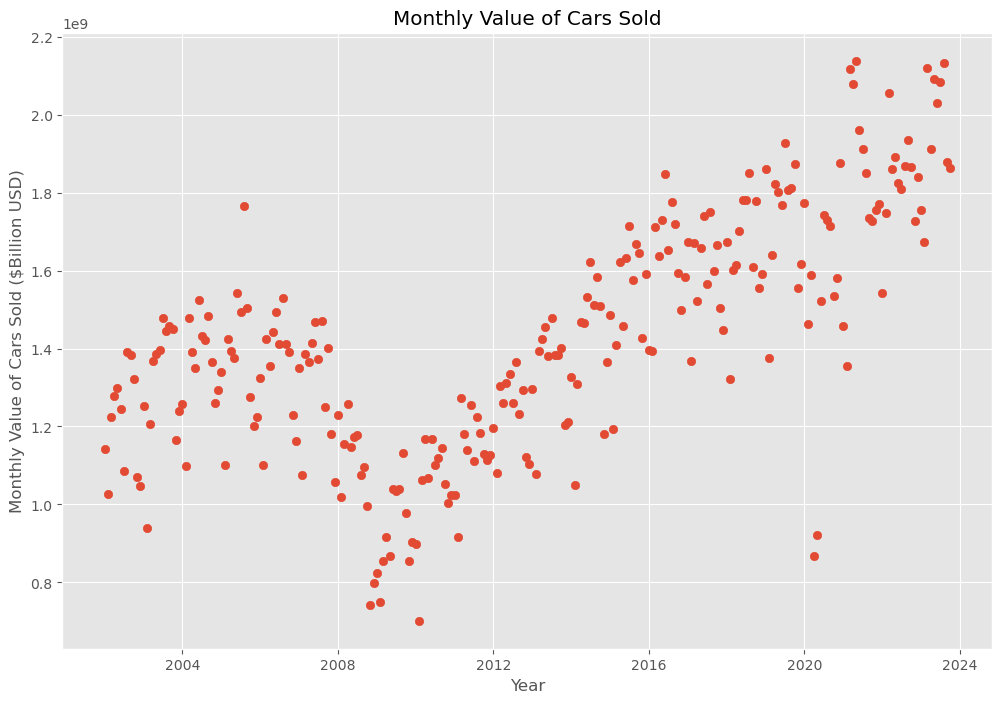

In [7]:
scatterplot(monthly_data.index,monthly_data['total_value_cars_sold'],'Monthly Value of Cars Sold','Year','Monthly Value of Cars Sold ($Billion USD)')

You can immediately notice the difference between the monthly number of cars sold in comparison to the monthly value of cars sold. There is a dip in value of cars sold from 2006 to 2010 however since then there has been a clear increasing trend in value of cars sold in Maryland. Another point of interest is in early stage of 2020 where the sales were the lowest that they had been in almost 10 years. Likely due to the global economic events that were discussed previously. 

## Average Price of Cars in Maryland
The value of cars sold can be divided by the number of cars sold to get the average price of cars that were sold during any particular month. This can be a useful visual of how inflation or other external factors may have impacted the car industry. Remember as noticed above the value of cars sold has been increasing but the number of total cars sold has not remaining steady/declining

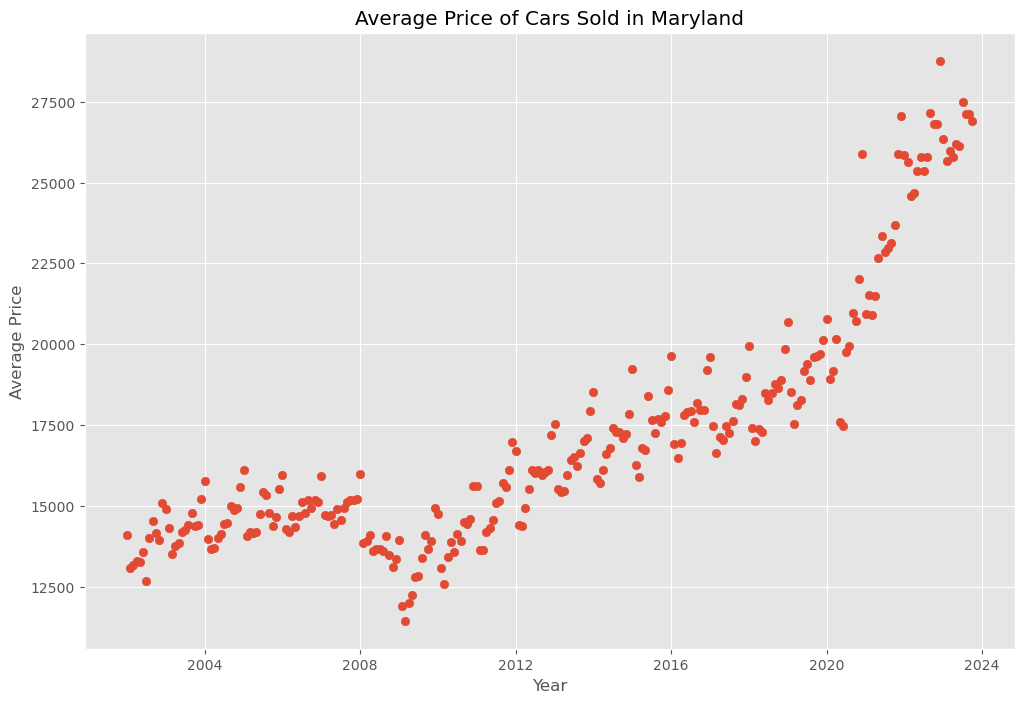

In [8]:
#Create a new column in the table that is called 'average_price' 
#Take the total_value_cars_sold series / total_cars_sold and this will create the average price per month
monthly_data['average_price'] = monthly_data['total_value_cars_sold'] / monthly_data['total_cars_sold']
scatterplot(monthly_data.index,monthly_data['average_price'],'Average Price of Cars Sold in Maryland','Year','Average Price')

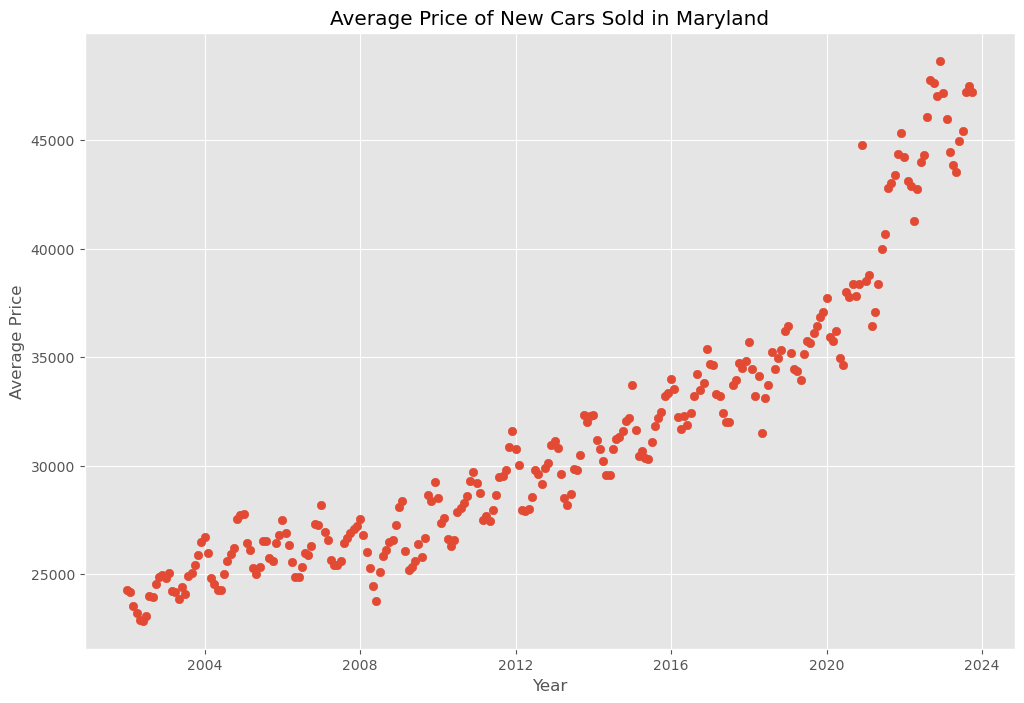

In [9]:
#Create a new column in the table that is called 'new_average_price' 
#Take the values_new_cars_sold series / new_cars_sold and this will create the average price of new cars sold per month
monthly_data['new_average_price'] = monthly_data['values_new_cars_sold'] / monthly_data['new_cars_sold']
scatterplot(monthly_data.index,monthly_data['new_average_price'],'Average Price of New Cars Sold in Maryland','Year','Average Price')

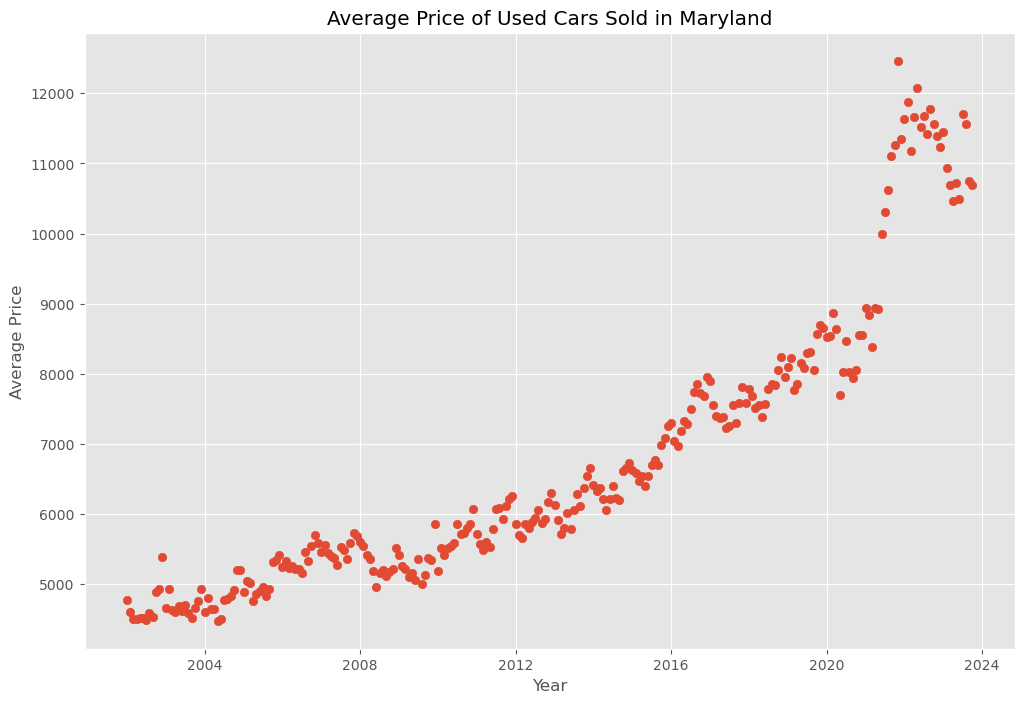

In [10]:
#Create a used column in the table that is called 'used_average_price' 
#Take the value_used_cars_sold series / used_cars_sold and this will create the average price of used cars sold per month
monthly_data['used_average_price'] = monthly_data['value_used_cars_sold'] / monthly_data['total_cars_sold']
scatterplot(monthly_data.index,monthly_data['used_average_price'],'Average Price of Used Cars Sold in Maryland','Year','Average Price')

The average price of new, used and a combination of the two follow a relatively similar trend. All graphs show a linear increase in average price of cars sold going form 2003-2023. However post 2020 there seems to be an exponential growth in all 3 graphs. The major difference is that used cars sold show a decline in average price post 2022. It is interesting that there is very little period of plateu and it seems to show a clear sign of decline. Where as new cars seemed to show a clear indication of an increase in average price. 

## Comparison of New vs Used Cars
Create a new column in the monthly_data dataset which represents the proportion that the new cars sold in both quantity and price take up the total. This is going to give insight as to how the types of cars that have been sold in Maryland have changed and where that has had an impact on the average price of cars sold, as you would expect new cars to be sold for more.

In [11]:
#Create the new columns that contain the proportion of new & used cars for total number of cars sold
#Create the new columns that contain the proportion of new & used value of total number of cars sold
monthly_data['new_proportion_total_cars'] = monthly_data['new_cars_sold'] / monthly_data['total_cars_sold']
monthly_data['used_proportion_total_cars'] = monthly_data['used_cars_sold'] / monthly_data['total_cars_sold']
monthly_data['new_proportion_value_total_cars'] = monthly_data['values_new_cars_sold'] / monthly_data['total_value_cars_sold']
monthly_data['used_proportion_value_total_cars'] = monthly_data['value_used_cars_sold'] / monthly_data['total_value_cars_sold']

monthly_data

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa,average_price,new_average_price,used_average_price,new_proportion_total_cars,used_proportion_total_cars,new_proportion_value_total_cars,used_proportion_value_total_cars
month,,,,,,,,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,5.0,5.5,2.6,14086.825725,24272.353244,4769.438735,0.383868,0.616132,0.661426,0.338574
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,5.0,5.2,2.6,13067.278095,24144.412173,4603.108736,0.350564,0.649436,0.647738,0.352262
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,5.0,5.1,2.4,13169.907557,23540.284704,4508.599179,0.367936,0.632064,0.657659,0.342341
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,4.9,4.9,2.5,13290.149965,23218.706710,4498.448618,0.378647,0.621353,0.661520,0.338480
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,4.9,4.7,2.5,13249.215753,22886.206376,4518.965549,0.381463,0.618537,0.658926,0.341074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,2.0,1.7,4.8,26137.254232,44973.926410,10491.352887,0.347888,0.652112,0.598605,0.401395
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,1.8,1.7,4.7,27479.401321,45406.618020,11701.825578,0.347473,0.652527,0.574160,0.425840
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,1.7,1.8,4.3,27112.071755,47247.715721,11557.792649,0.329207,0.670793,0.573703,0.426297


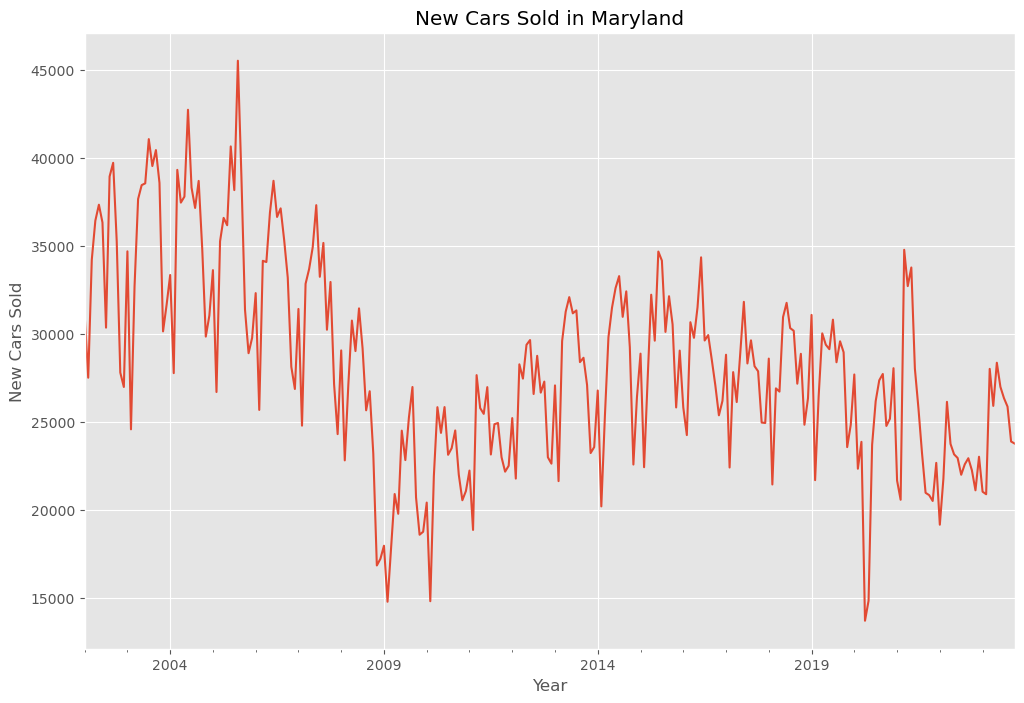

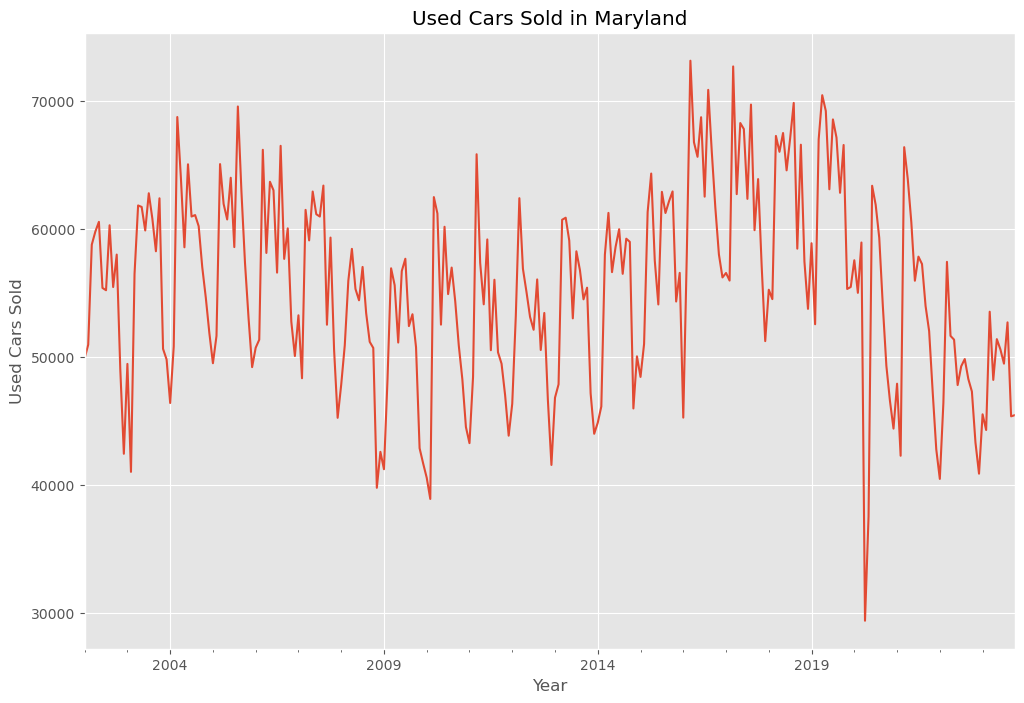

In [12]:
#Create a time series graph of new and used cars sold in Maryland
line_time_series(monthly_data.index,monthly_data['new_cars_sold'],'New Cars Sold in Maryland','Year','New Cars Sold')
line_time_series(monthly_data.index,monthly_data['used_cars_sold'],'Used Cars Sold in Maryland','Year','Used Cars Sold')


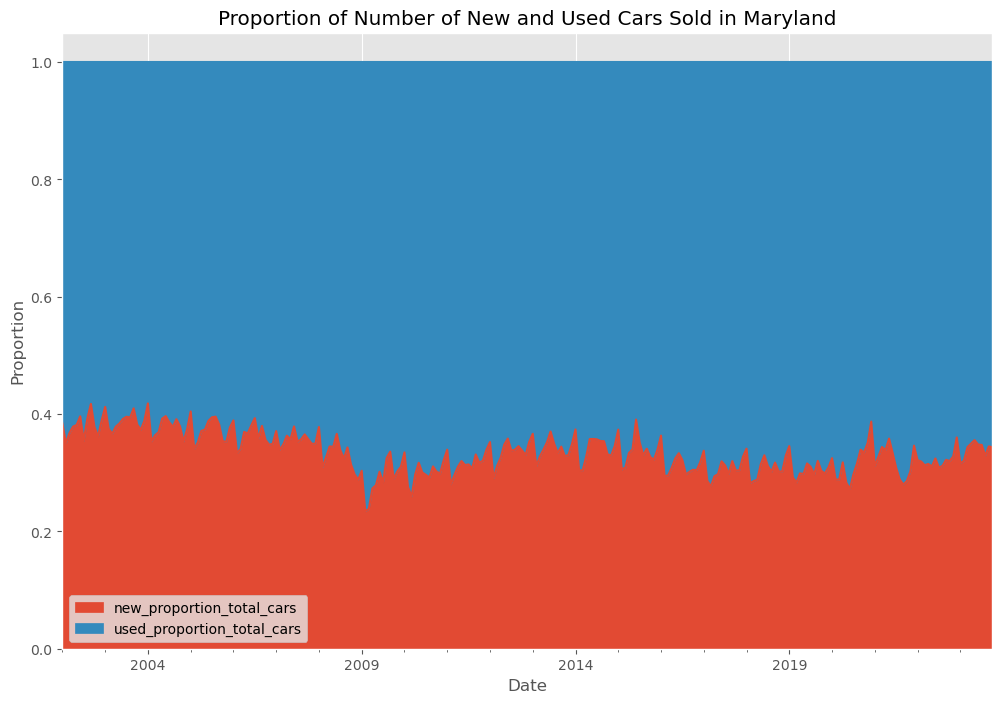

In [13]:
#Create a stacked plot of the used vs new total cars sold proportion
monthly_data[['new_proportion_total_cars', 'used_proportion_total_cars']].plot(kind='area', stacked=True)
plt.title('Proportion of Number of New and Used Cars Sold in Maryland')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

There is one major point of difference when comparing new vs used cars sold in Maryland. The difference is the drop that takes place in 2008. The drop in cars sold in 2008-2009 due to the GCF was far greater than the drop for the new cars sold. This is reflected in the proportion of new and used cars sold where the red ('new_proportion_total_cars) has a steep drop as the number of used cars sold increased relatively compared to new cars sold. Besides that major point of difference their trends follow a similar upwards trend post the GCF. They both experience a major drop when the Covid-19 Pandemic influences the economy. However, the drop in used cars sold is far greater than the drop in new cars sold for March of 2020 which was when the Covid-19 Pandemic's shock impact to the economy was most felt.

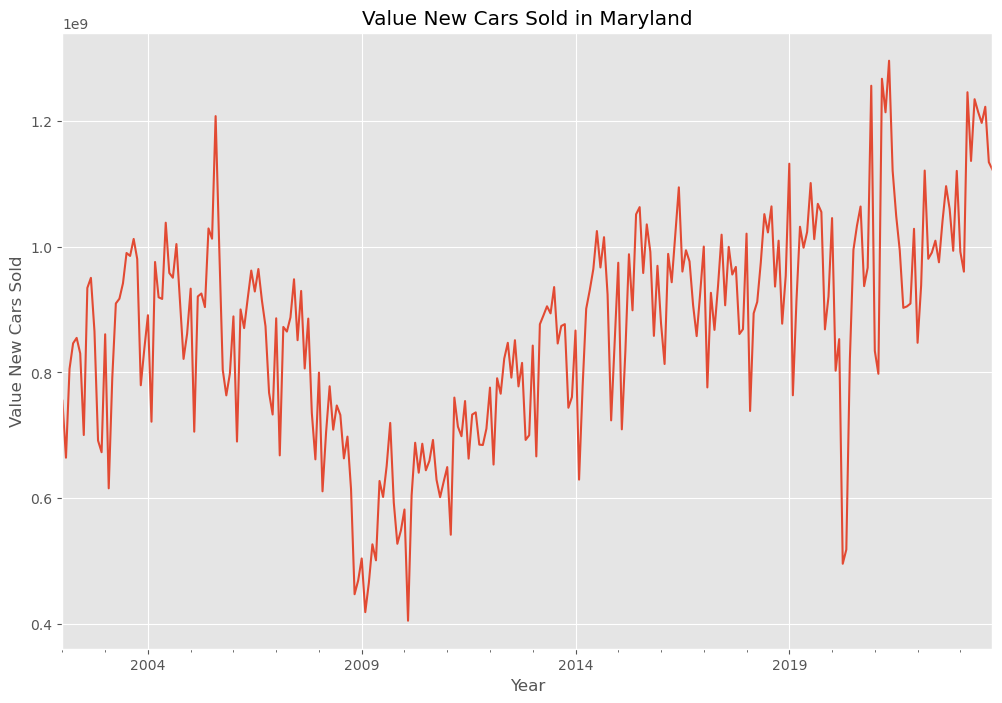

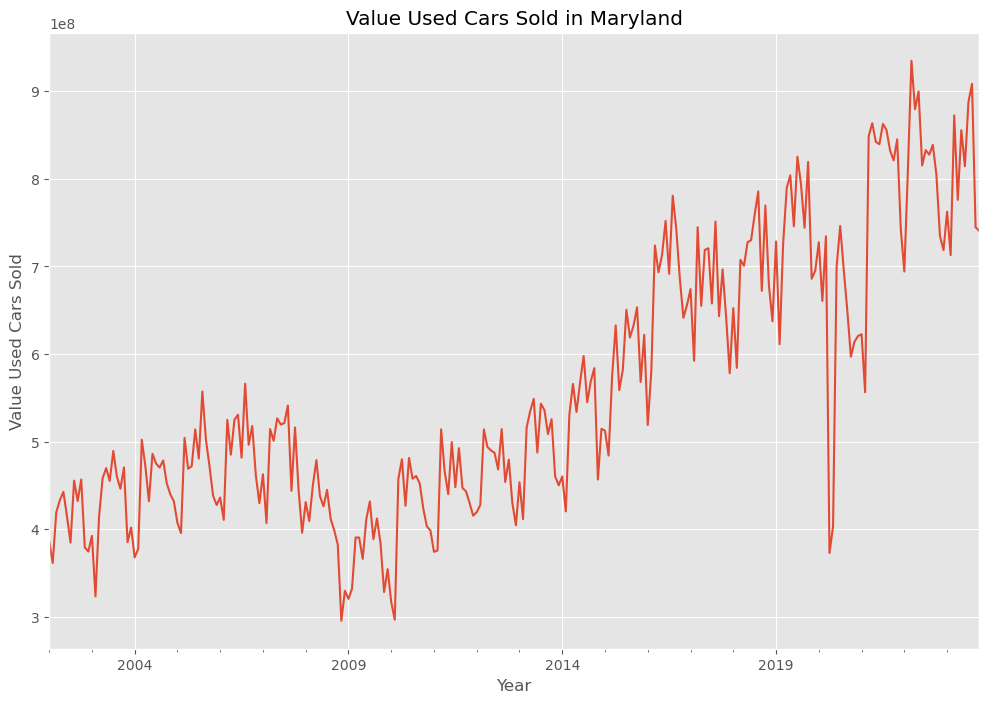

In [14]:
#Create a time series graph of new and used cars sold in Maryland
line_time_series(monthly_data.index,monthly_data['values_new_cars_sold'],'Value New Cars Sold in Maryland','Year','Value New Cars Sold')
line_time_series(monthly_data.index,monthly_data['value_used_cars_sold'],'Value Used Cars Sold in Maryland','Year','Value Used Cars Sold')

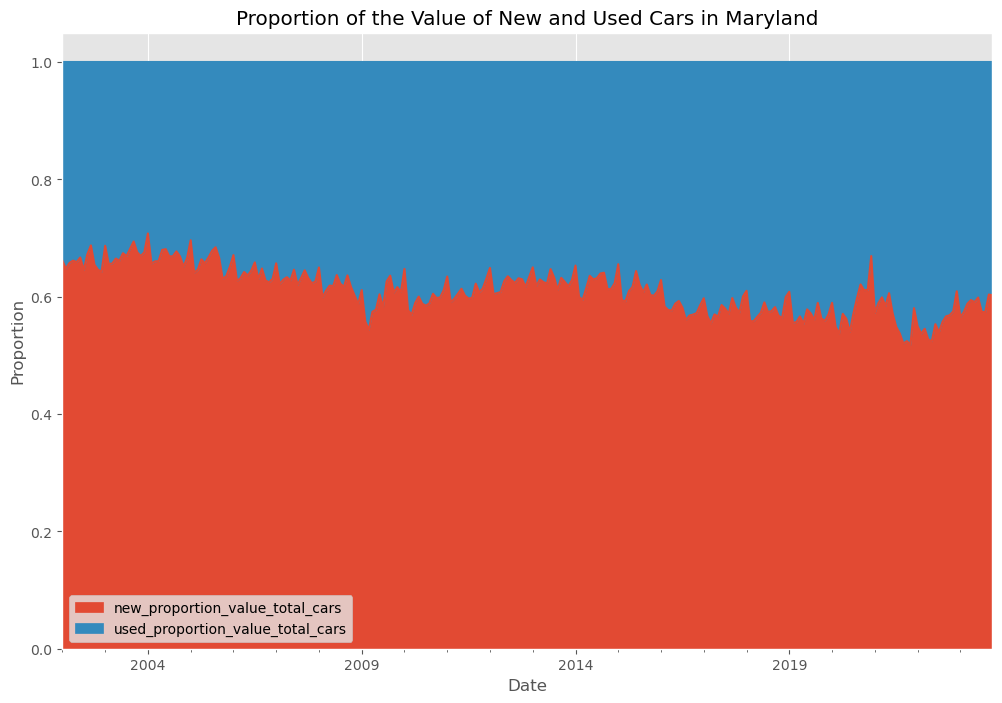

In [15]:
#Create a stacked plot of the used vs new total cars sold proportion
monthly_data[['new_proportion_value_total_cars', 'used_proportion_value_total_cars']].plot(kind='area', stacked=True)
plt.title('Proportion of the Value of New and Used Cars in Maryland')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

The value of new and used cars sold follow a very similar pattern. This is reflected well in the proportion of new vs used cars sold. When the proportions do not indicate any major changes this reflects that the pattern of new and used value of cars sold is similar. There is one period of major difference however, this is during 2020 where the value of new cars sold spiked a lot higher than the used cars sold. This is likely due to the cost of used cars increasing leading to a lot of people taking the opportunity to purchase a new car rather than used. Another difference is that the variable of used cars sold is much smaller and follows more of a linear trend from 2003 to 2023.

## Yearly Data Exploration

In [16]:
#Load in the datasets that have been joined in SQL so that all variables have been included
#This file is found in R_files in chapter 1 yearly cars sold as cars_sold_economic_socioeconomic_data.csv
yearly_data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/R_files/chapter 1 yearly cars sold/yearly_car_sales_all_data.csv')
yearly_data

,average_annual_pay,gdp_maryland,inflation_rate_cpi,average_weekly_wage,total_wages_thousands,year,maryland_population,total_workforce,new_cars_sold,used_cars_sold,value_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold
0,39382,217837100000,2.4,757,95589510000,2002-01-01,5440389.0,2427396.0,402164,656089,9572554876,4940209772,1058253,14512764648
1,40686,228959300000,1.4,782,99039956000,2003-01-01,5496269.0,2434480.0,428252,675358,10623148339,5166071497,1103610,15789219836
2,42579,245124500000,1.8,819,104716511000,2004-01-01,5546935.0,2461074.0,428508,699677,10972956024,5385548947,1128185,16358504971
3,44368,262100000000,2.2,853,110807924000,2005-01-01,5592379.0,2497416.0,421834,703835,11006733922,5639803515,1125669,16646537437
4,46162,274145300000,2.5,888,116791342000,2006-01-01,5627367.0,2530129.0,399282,696968,10411657206,5865687318,1096250,16277344524
5,48241,282965600000,2.3,928,122886661000,2007-01-01,5653408.0,2546850.0,378184,678549,9997917483,5794213869,1056733,15792131352
6,49535,295400200000,2.3,953,125706584000,2008-01-01,5684965.0,2537400.0,309159,617885,7975401987,4896167840,927044,12871569827
7,50579,299102700000,1.7,973,124479932000,2009-01-01,5730388.0,2460972.0,248928,608889,6686217914,4510040527,857817,11196258441
8,51739,314728300000,1.0,995,126926286000,2010-01-01,5788784.0,2454418.0,268022,626045,7460915522,5054802303,894067,12515717825
9,53008,326281200000,1.7,1019,131379799000,2011-01-01,5840241.0,2479122.0,287669,625728,8331732402,5345074083,913397,13676806485


In [17]:
#Convert the year column into a dataframe
yearly_data['month'] = pd.to_datetime(yearly_data['year'])
yearly_data.set_index('year', inplace=True)
yearly_data

,average_annual_pay,gdp_maryland,inflation_rate_cpi,average_weekly_wage,total_wages_thousands,maryland_population,total_workforce,new_cars_sold,used_cars_sold,value_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,month
year,,,,,,,,,,,,,,
2002-01-01,39382,217837100000,2.4,757,95589510000,5440389.0,2427396.0,402164,656089,9572554876,4940209772,1058253,14512764648,2002-01-01
2003-01-01,40686,228959300000,1.4,782,99039956000,5496269.0,2434480.0,428252,675358,10623148339,5166071497,1103610,15789219836,2003-01-01
2004-01-01,42579,245124500000,1.8,819,104716511000,5546935.0,2461074.0,428508,699677,10972956024,5385548947,1128185,16358504971,2004-01-01
2005-01-01,44368,262100000000,2.2,853,110807924000,5592379.0,2497416.0,421834,703835,11006733922,5639803515,1125669,16646537437,2005-01-01
2006-01-01,46162,274145300000,2.5,888,116791342000,5627367.0,2530129.0,399282,696968,10411657206,5865687318,1096250,16277344524,2006-01-01
2007-01-01,48241,282965600000,2.3,928,122886661000,5653408.0,2546850.0,378184,678549,9997917483,5794213869,1056733,15792131352,2007-01-01
2008-01-01,49535,295400200000,2.3,953,125706584000,5684965.0,2537400.0,309159,617885,7975401987,4896167840,927044,12871569827,2008-01-01
2009-01-01,50579,299102700000,1.7,973,124479932000,5730388.0,2460972.0,248928,608889,6686217914,4510040527,857817,11196258441,2009-01-01
2010-01-01,51739,314728300000,1.0,995,126926286000,5788784.0,2454418.0,268022,626045,7460915522,5054802303,894067,12515717825,2010-01-01


In [18]:
#Create the new columns that contain the proportion of new & used cars for total number of cars sold
#Create the new columns that contain the proportion of new & used value of total number of cars sold
yearly_data['new_proportion_total_cars'] = yearly_data['new_cars_sold'] /yearly_data['total_cars_sold']
yearly_data['used_proportion_total_cars'] = yearly_data['used_cars_sold'] / yearly_data['total_cars_sold']
yearly_data['new_proportion_value_total_cars'] = yearly_data['value_new_cars_sold'] / yearly_data['total_value_cars_sold']
yearly_data['used_proportion_value_total_cars'] = yearly_data['value_used_cars_sold'] / yearly_data['total_value_cars_sold']

yearly_data

,average_annual_pay,gdp_maryland,inflation_rate_cpi,average_weekly_wage,total_wages_thousands,maryland_population,total_workforce,new_cars_sold,used_cars_sold,value_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,month,new_proportion_total_cars,used_proportion_total_cars,new_proportion_value_total_cars,used_proportion_value_total_cars
year,,,,,,,,,,,,,,,,,,
2002-01-01,39382,217837100000,2.4,757,95589510000,5440389.0,2427396.0,402164,656089,9572554876,4940209772,1058253,14512764648,2002-01-01,0.380026,0.619974,0.659596,0.340404
2003-01-01,40686,228959300000,1.4,782,99039956000,5496269.0,2434480.0,428252,675358,10623148339,5166071497,1103610,15789219836,2003-01-01,0.388047,0.611953,0.672810,0.327190
2004-01-01,42579,245124500000,1.8,819,104716511000,5546935.0,2461074.0,428508,699677,10972956024,5385548947,1128185,16358504971,2004-01-01,0.379821,0.620179,0.670780,0.329220
2005-01-01,44368,262100000000,2.2,853,110807924000,5592379.0,2497416.0,421834,703835,11006733922,5639803515,1125669,16646537437,2005-01-01,0.374741,0.625259,0.661203,0.338797
2006-01-01,46162,274145300000,2.5,888,116791342000,5627367.0,2530129.0,399282,696968,10411657206,5865687318,1096250,16277344524,2006-01-01,0.364225,0.635775,0.639641,0.360359
2007-01-01,48241,282965600000,2.3,928,122886661000,5653408.0,2546850.0,378184,678549,9997917483,5794213869,1056733,15792131352,2007-01-01,0.357880,0.642120,0.633095,0.366905
2008-01-01,49535,295400200000,2.3,953,125706584000,5684965.0,2537400.0,309159,617885,7975401987,4896167840,927044,12871569827,2008-01-01,0.333489,0.666511,0.619614,0.380386
2009-01-01,50579,299102700000,1.7,973,124479932000,5730388.0,2460972.0,248928,608889,6686217914,4510040527,857817,11196258441,2009-01-01,0.290188,0.709812,0.597183,0.402817
2010-01-01,51739,314728300000,1.0,995,126926286000,5788784.0,2454418.0,268022,626045,7460915522,5054802303,894067,12515717825,2010-01-01,0.299778,0.700222,0.596124,0.403876


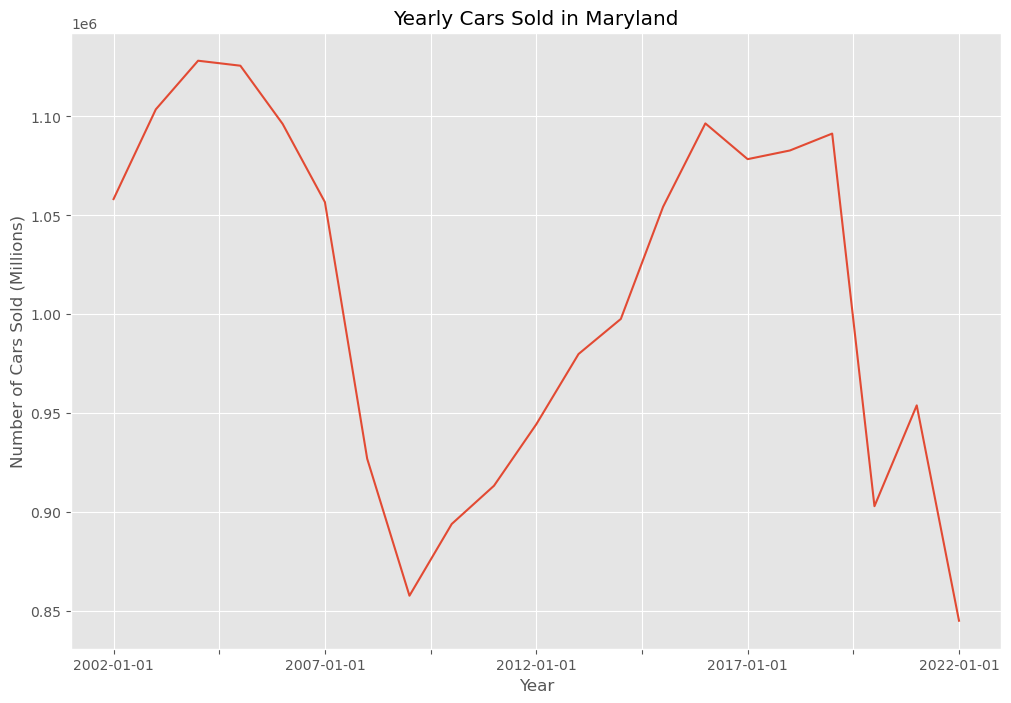

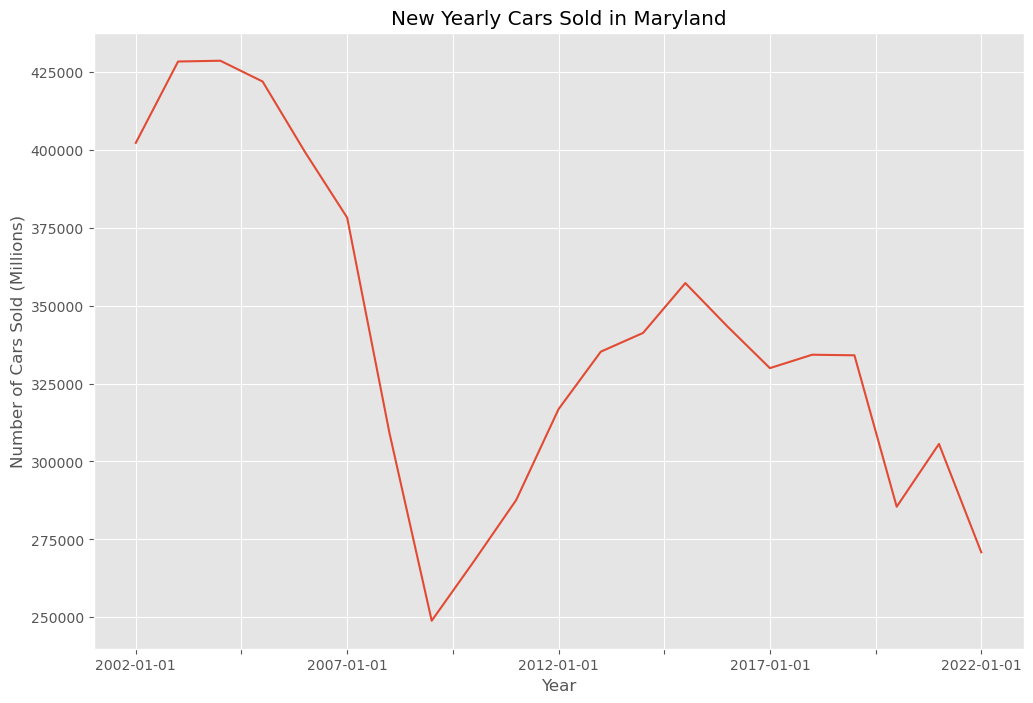

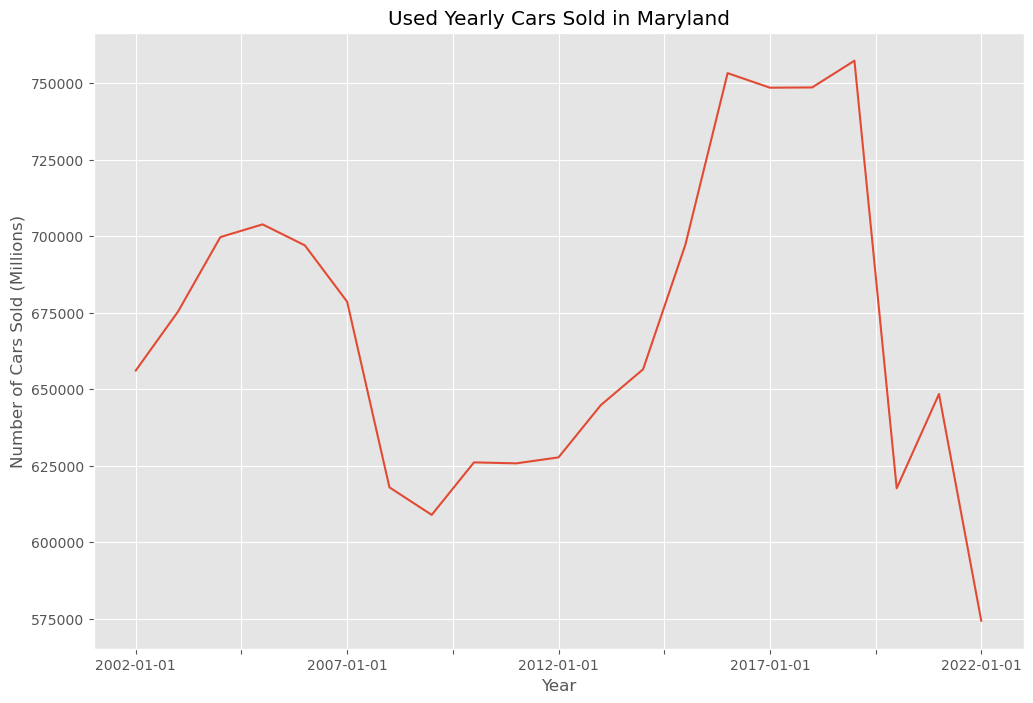

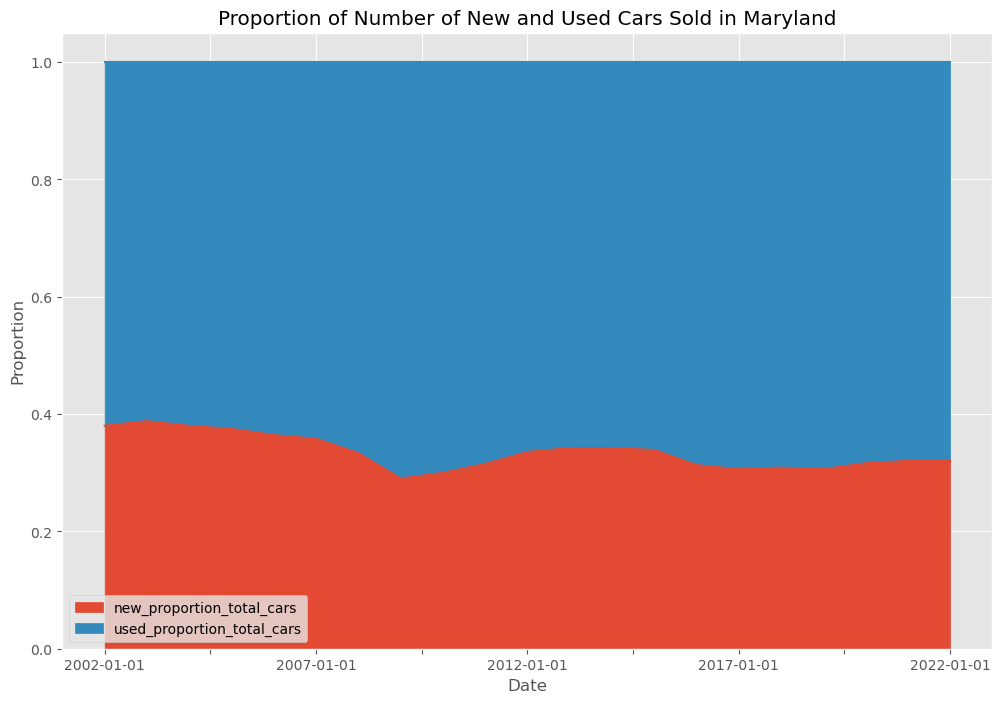

In [19]:
#Create a time series of yearly number of cars sold in Maryland
line_time_series(yearly_data.index,yearly_data['total_cars_sold'],'Yearly Cars Sold in Maryland','Year','Number of Cars Sold (Millions)')
line_time_series(yearly_data.index,yearly_data['new_cars_sold'],'New Yearly Cars Sold in Maryland','Year','Number of Cars Sold (Millions)')
line_time_series(yearly_data.index,yearly_data['used_cars_sold'],'Used Yearly Cars Sold in Maryland','Year','Number of Cars Sold (Millions)')

#Create a stacked plot of the used vs new total cars sold proportion
yearly_data[['new_proportion_total_cars', 'used_proportion_total_cars']].plot(kind='area', stacked=True)
plt.title('Proportion of Number of New and Used Cars Sold in Maryland')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

Looking at a yearly representation of data compared to monthly you get a better understanding of the overall trend. There are two periods of peaks with two periods of downturns. The first downturn is the calendar year of 2009. This is quite a steep fall from the number of cars sold that took place from 2004-2006. The next downturn is post 2019 and continues until the end of 2022. Both of these downturns take place following the GCF and Covid-19 Pandemic which suggests that there is a need for greater understanding of the ecnonomy and how much that impacts the state of the automotive industry in Maryland (Chapter 3). 

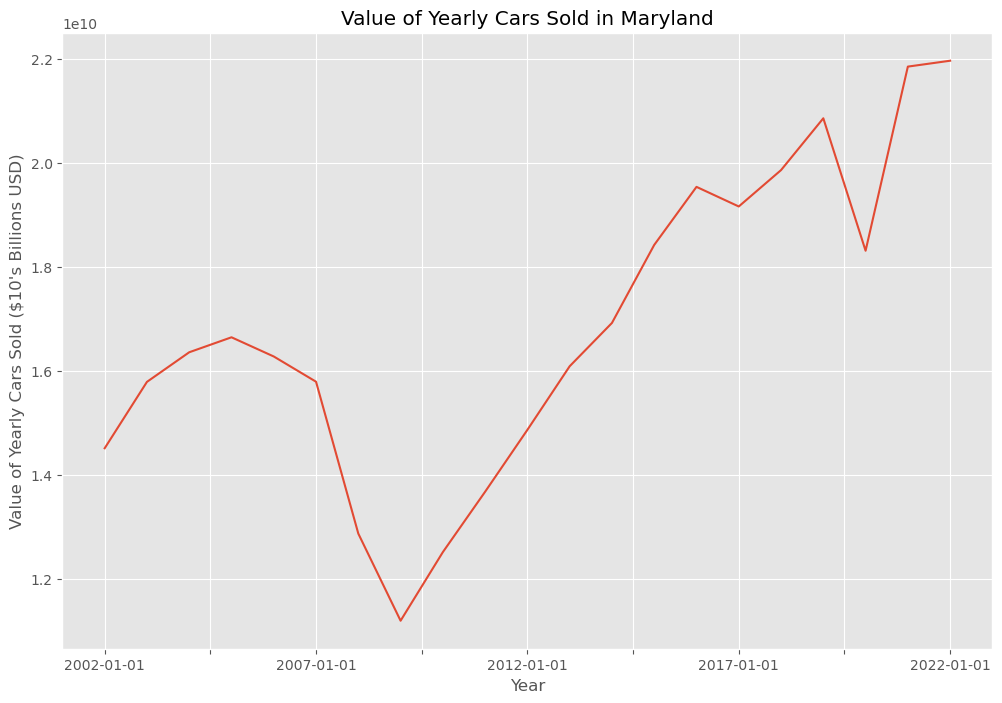

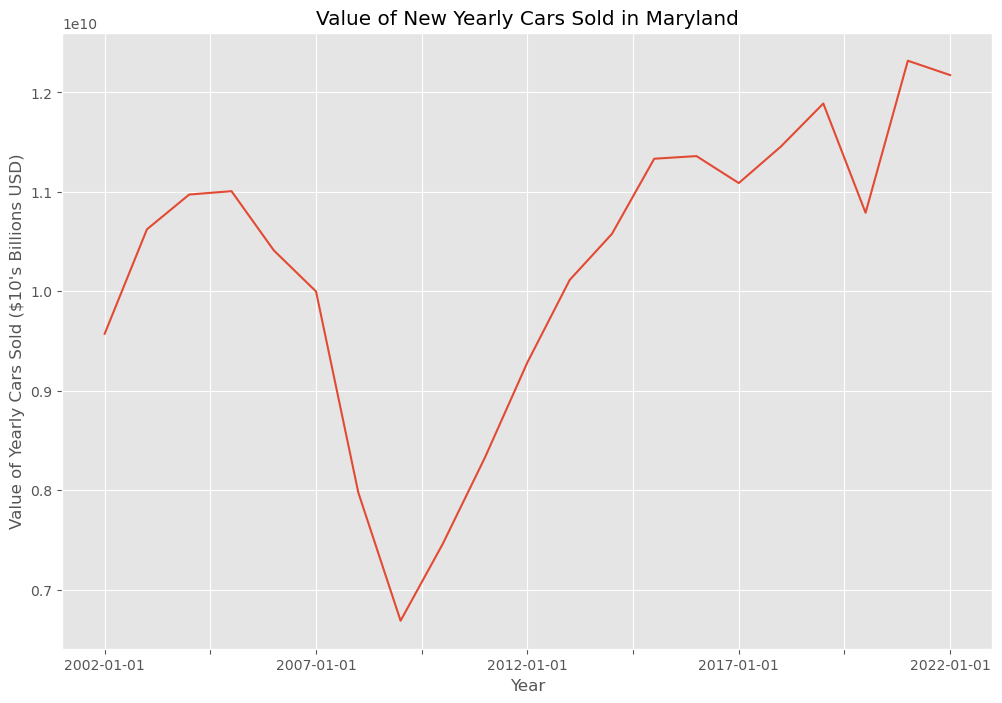

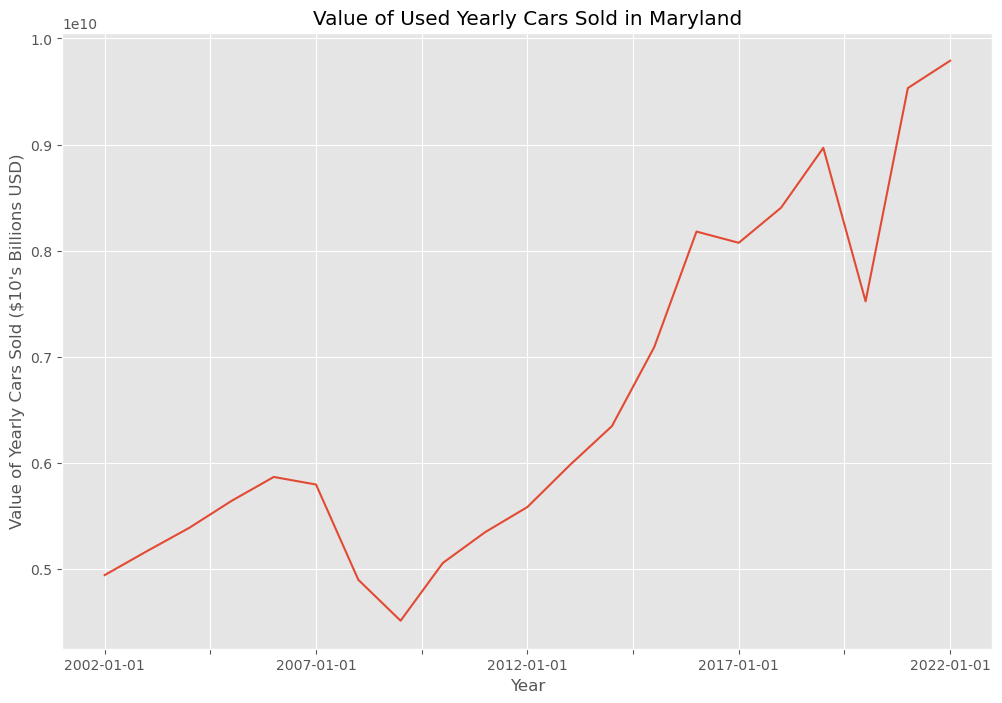

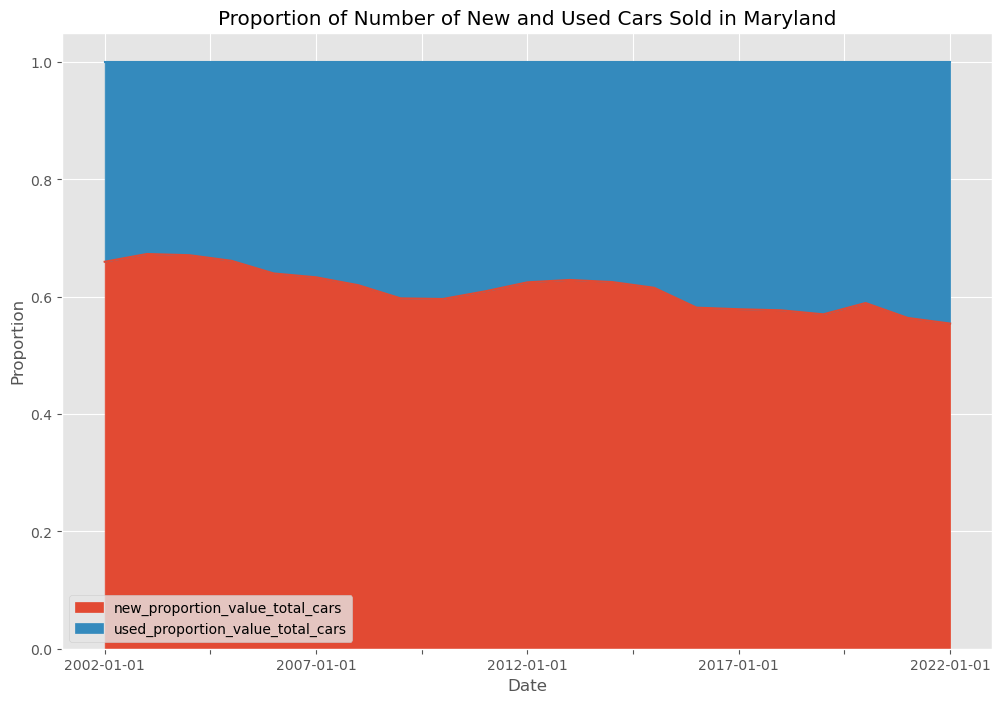

In [20]:
line_time_series(yearly_data.index,yearly_data['total_value_cars_sold'],'Value of Yearly Cars Sold in Maryland','Year','Value of Yearly Cars Sold ($10\'s Billions USD)')
line_time_series(yearly_data.index,yearly_data['value_new_cars_sold'],'Value of New Yearly Cars Sold in Maryland','Year','Value of Yearly Cars Sold ($10\'s Billions USD)')
line_time_series(yearly_data.index,yearly_data['value_used_cars_sold'],'Value of Used Yearly Cars Sold in Maryland','Year','Value of Yearly Cars Sold ($10\'s Billions USD)')

#Create a stacked plot of the used vs new total cars sold proportion
yearly_data[['new_proportion_value_total_cars', 'used_proportion_value_total_cars']].plot(kind='area', stacked=True)
plt.title('Proportion of Number of New and Used Cars Sold in Maryland')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

After looking at the car sales, it is now time to look at the inflation rate, unemployment rate not seasonally adjusted and unemployment rate seasonally adjusted. Another activity that can be considered is looking at the yearly data and creating cubic splines or other interpolation techniques to get monthly values.

In [24]:
monthly_data

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa,average_price,new_average_price,used_average_price,new_proportion_total_cars,used_proportion_total_cars,new_proportion_value_total_cars,used_proportion_value_total_cars
month,,,,,,,,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,5.0,5.5,2.6,14086.825725,24272.353244,4769.438735,0.383868,0.616132,0.661426,0.338574
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,5.0,5.2,2.6,13067.278095,24144.412173,4603.108736,0.350564,0.649436,0.647738,0.352262
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,5.0,5.1,2.4,13169.907557,23540.284704,4508.599179,0.367936,0.632064,0.657659,0.342341
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,4.9,4.9,2.5,13290.149965,23218.706710,4498.448618,0.378647,0.621353,0.661520,0.338480
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,4.9,4.7,2.5,13249.215753,22886.206376,4518.965549,0.381463,0.618537,0.658926,0.341074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,2.0,1.7,4.8,26137.254232,44973.926410,10491.352887,0.347888,0.652112,0.598605,0.401395
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,1.8,1.7,4.7,27479.401321,45406.618020,11701.825578,0.347473,0.652527,0.574160,0.425840
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,1.7,1.8,4.3,27112.071755,47247.715721,11557.792649,0.329207,0.670793,0.573703,0.426297


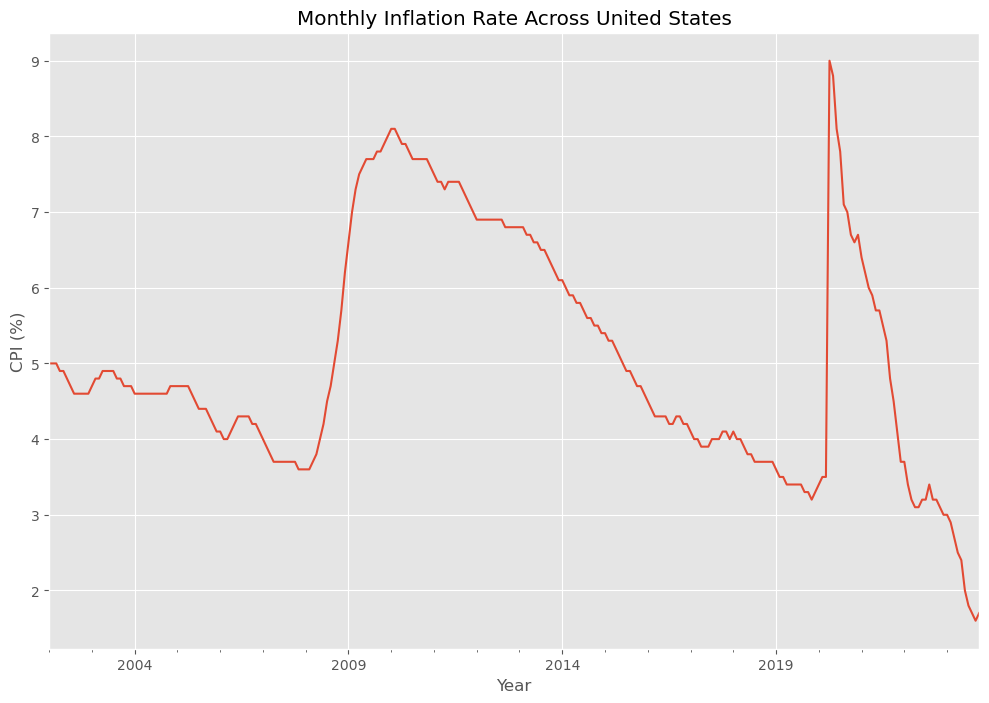

In [25]:
line_time_series(monthly_data.index,monthly_data['inflation_rate_cpi'],'Monthly Inflation Rate Across United States','Year','CPI (%)')

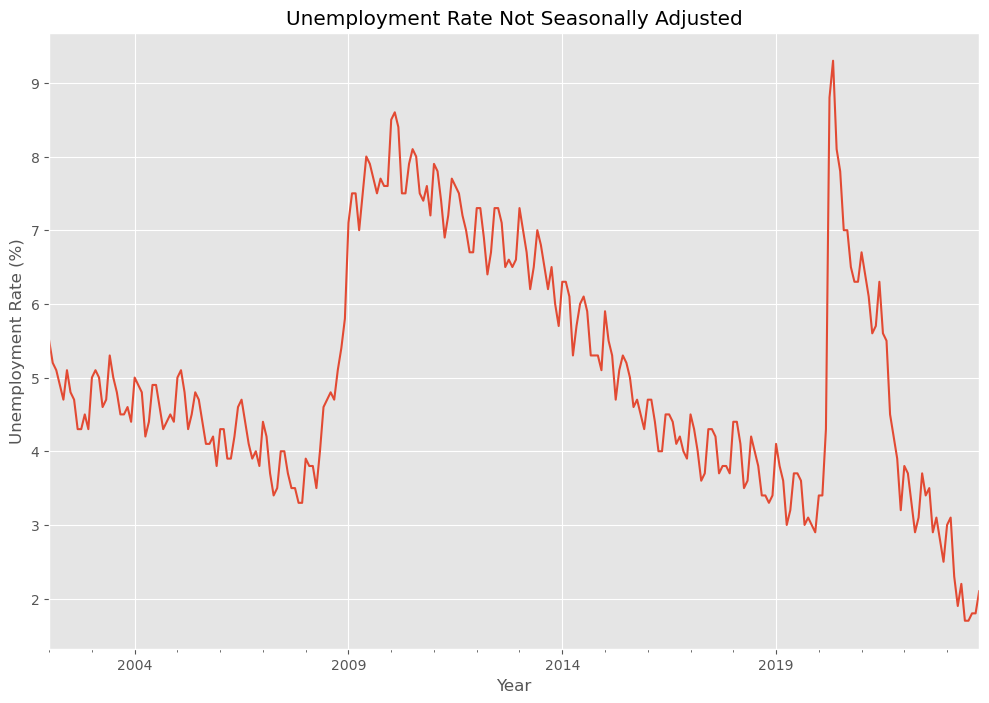

In [26]:
line_time_series(monthly_data.index,monthly_data['unemployment_rate_not_sa'],'Unemployment Rate Not Seasonally Adjusted','Year','Unemployment Rate (%)')

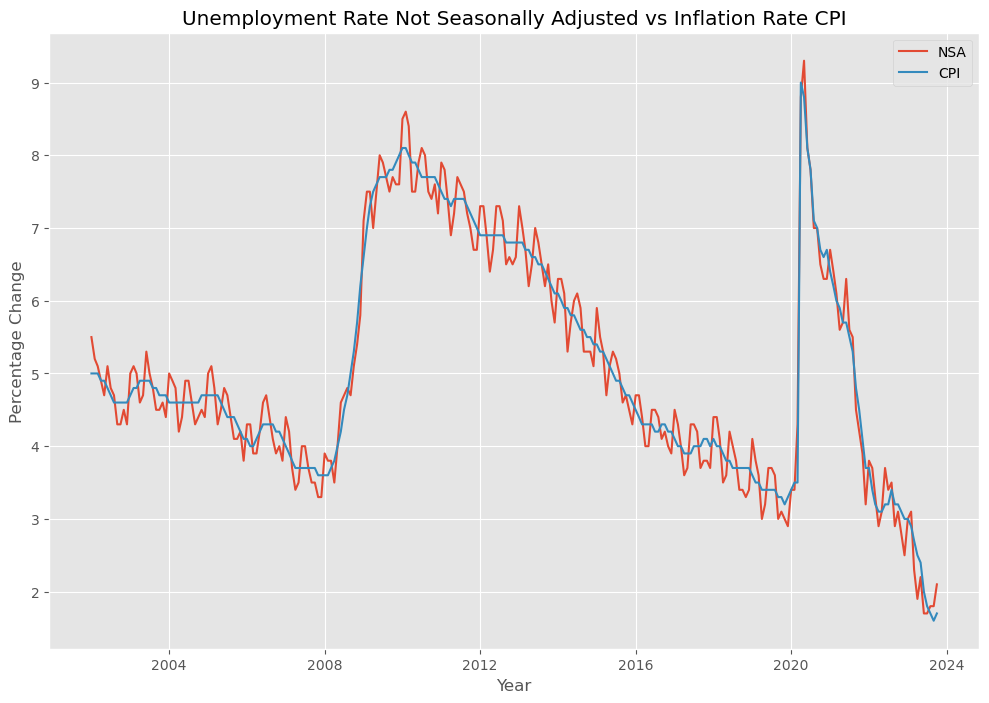

In [33]:
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Unemployment Rate Not Seasonally Adjusted vs Inflation Rate CPI')

plt.plot(monthly_data.index,monthly_data['unemployment_rate_not_sa'],label='NSA')
plt.plot(monthly_data.index,monthly_data['inflation_rate_cpi'],label='CPI')

plt.legend()

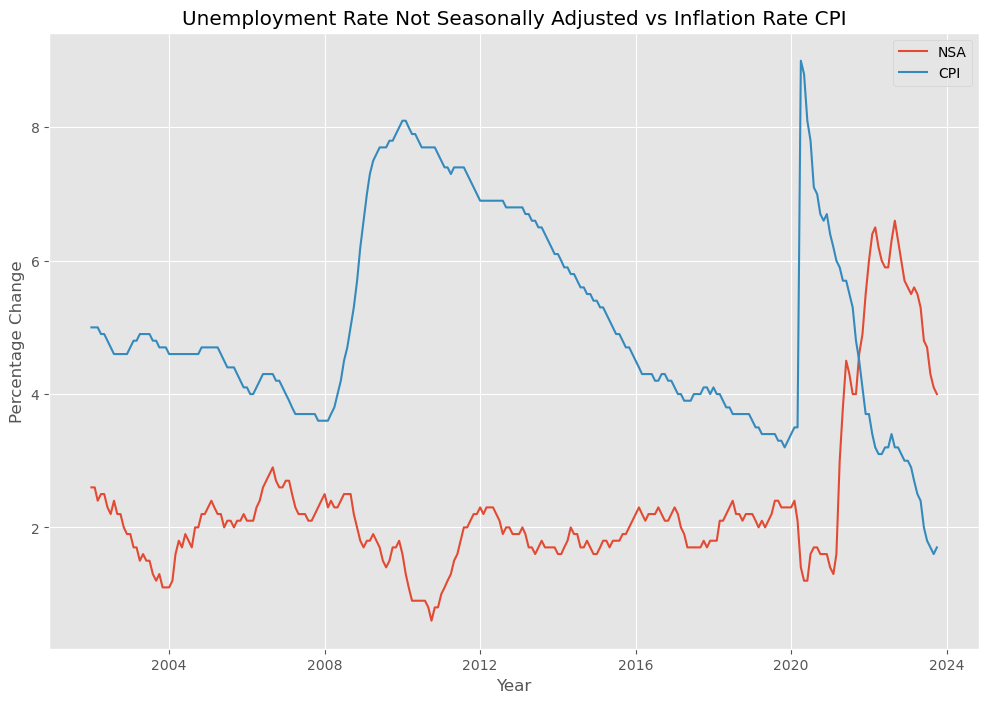

In [34]:
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Unemployment Rate Not Seasonally Adjusted vs Inflation Rate CPI')

plt.plot(monthly_data.index,monthly_data['unemployment_rate_sa'],label='NSA')
plt.plot(monthly_data.index,monthly_data['inflation_rate_cpi'],label='CPI')

plt.legend()